In [1]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df = df[['clear_date', 'due_in_date']]
df

,clear_date,due_in_date
0,2/11/2020 0:00,20200210
1,8/8/2019 0:00,20190811
2,12/30/2019 0:00,20190929
3,NaN,20200410
4,11/25/2019 0:00,20191128
...,...,...
49995,NaN,20200506
49996,9/3/2019 0:00,20190830
49997,3/5/2020 0:00,20200305
49998,12/12/2019 0:00,20191212


In [9]:
df = df.dropna(ignore_index = True)
df

,clear_date,due_in_date
0,2/11/2020 0:00,20200210
1,8/8/2019 0:00,20190811
2,12/30/2019 0:00,20190929
3,11/25/2019 0:00,20191128
4,12/4/2019 0:00,20191004
...,...,...
39995,7/25/2019 0:00,20190725
39996,9/3/2019 0:00,20190830
39997,3/5/2020 0:00,20200305
39998,12/12/2019 0:00,20191212


In [15]:
from datetime import datetime

In [35]:
tempdf = df[:1000]
for day in tempdf['due_in_date']:
    temp = day
    day = str(day)
    date_obj = datetime.strptime(day, "%Y%m%d")
    date_obj = date_obj.date()
    tempdf['due_in_date'] = tempdf['due_in_date'].replace([temp], date_obj)

C:\Users\kaush\AppData\Local\Temp\ipykernel_35156\4028249721.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['due_in_date'] = tempdf['due_in_date'].replace([temp], date_obj)


In [11]:
tempdf

,clear_date,due_in_date
0,2/11/2020 0:00,2020-02-10
1,8/8/2019 0:00,2019-08-11
2,12/30/2019 0:00,2019-09-29
3,11/25/2019 0:00,2019-11-28
4,12/4/2019 0:00,2019-10-04
5,11/12/2019 0:00,2019-11-16
6,6/18/2019 0:00,2019-06-22
7,3/6/2019 0:00,2019-03-07
8,1/22/2019 0:00,2019-01-17
9,5/6/2019 0:00,2019-04-30


In [36]:
for date in tempdf['clear_date']:
    temp = date
    date = datetime.strptime(date, "%m/%d/%Y %H:%M")
    date_obj = date.date()
    tempdf['clear_date'] = tempdf['clear_date'].replace([temp], date_obj)

C:\Users\kaush\AppData\Local\Temp\ipykernel_35156\3721848262.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['clear_date'] = tempdf['clear_date'].replace([temp], date_obj)


In [37]:
diff = []
for index, row in tempdf.iterrows():
    tempDiff = row['due_in_date'] - row['clear_date']
    tempDiff = tempDiff.days
    diff.append(tempDiff)


In [38]:
tempdf.loc[:, "dayDiff"] = diff

C:\Users\kaush\AppData\Local\Temp\ipykernel_35156\2486215771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf.loc[:, "dayDiff"] = diff


In [39]:
tempdf

,clear_date,due_in_date,dayDiff
0,2020-02-11,2020-02-10,-1
1,2019-08-08,2019-08-11,3
2,2019-12-30,2019-09-29,-92
3,2019-11-25,2019-11-28,3
4,2019-12-04,2019-10-04,-61
...,...,...,...
995,2019-06-03,2019-06-06,3
996,2019-10-25,2019-10-25,0
997,2019-04-15,2019-04-12,-3
998,2019-04-04,2019-04-06,2


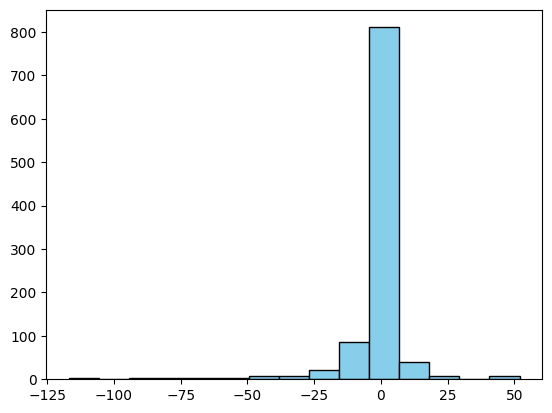

In [41]:
import matplotlib.pyplot as plt
diffPlot = tempdf['dayDiff']
plt.hist(diffPlot, bins=15, color='skyblue', edgecolor='black')
plt.show()